# 11. Local features – matching

In [9]:
import cv2
import matplotlib.pyplot as plt

def show_image(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

### Detect the keypoints in two different images and draw the found matches

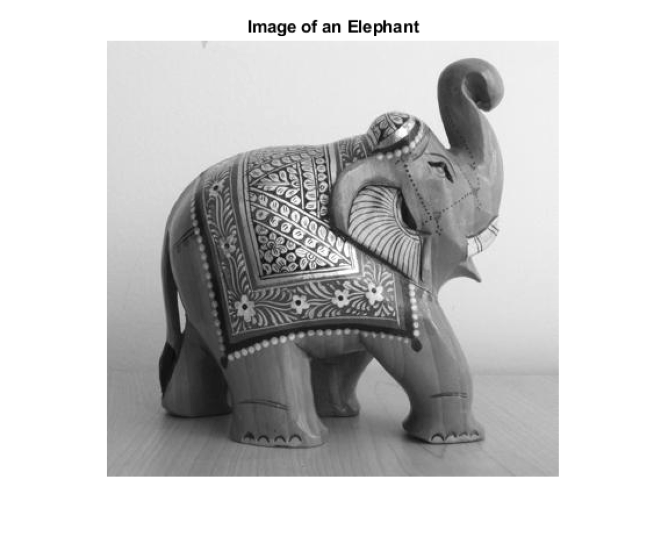

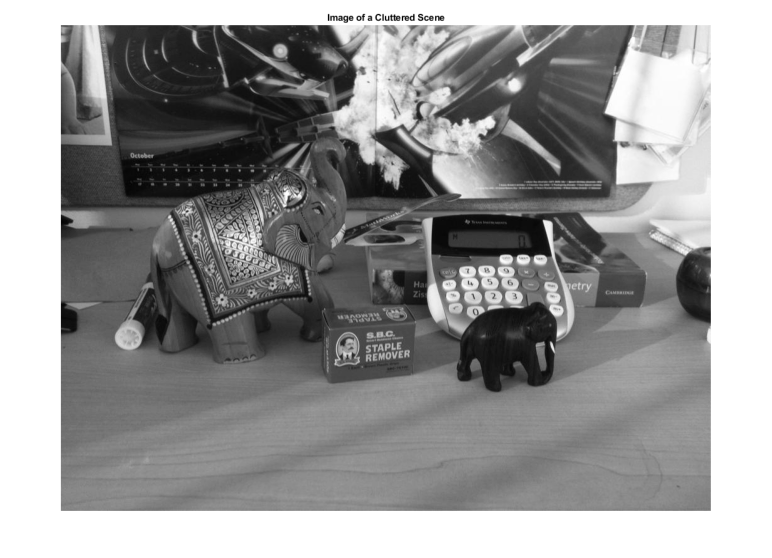

In [12]:
query = cv2.imread("Images/match_scene01_2.png", cv2.IMREAD_GRAYSCALE) 
train = cv2.imread("Images/match_scene01_3.png", cv2.IMREAD_GRAYSCALE) 

plt.rcParams['figure.figsize'] = [15, 10]

show_image(query)
show_image(train)

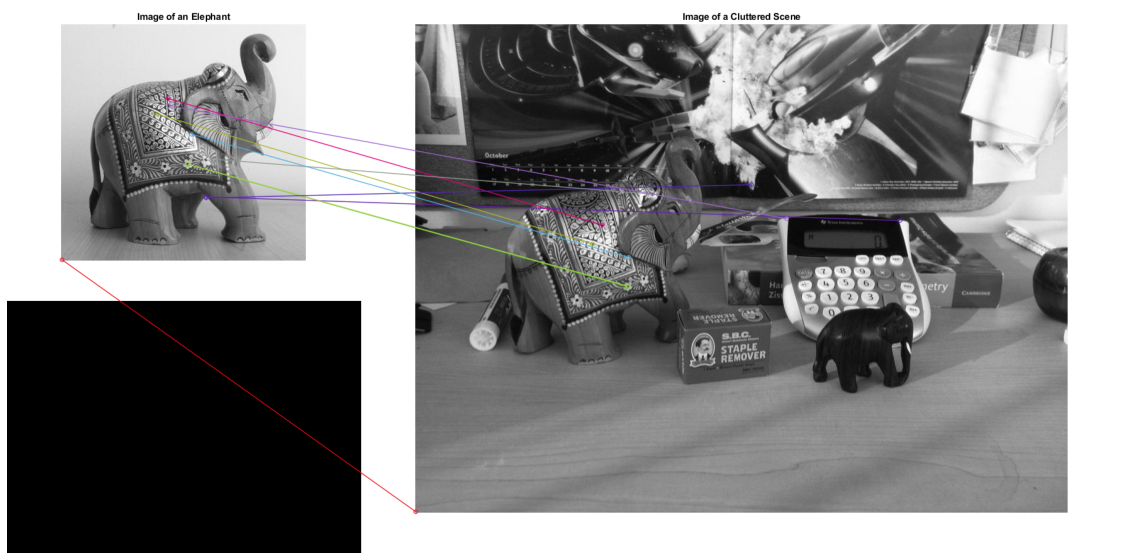

In [14]:
# Initiate ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(query, None)
kp2, des2 = orb.detectAndCompute(train, None)

# Create a Brute Force Matcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptor
matches = bf.match(des1, des2)

# Sort them in the order of their distance
matches = sorted(matches, key = lambda x:x.distance)

# Draw first 10 matches.
match_output = cv2.drawMatches(query, kp1, train, kp2, matches[:10], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.rcParams['figure.figsize'] = [20, 20]

show_image(match_output)